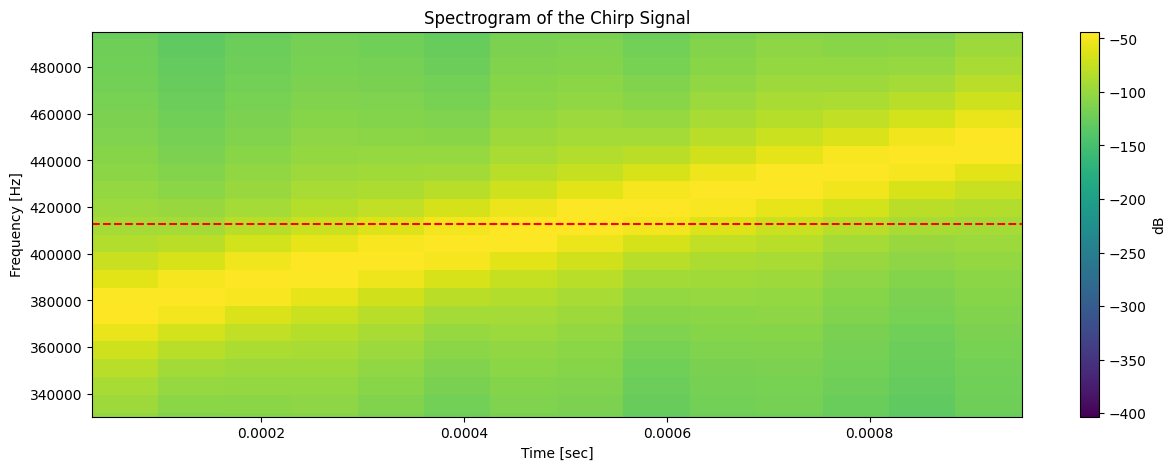

In [10]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
from scipy import signal

frev = 412657.22413208015

def generate_chirp(start_freq, end_freq, duration, fs):
    # Time array
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    # Generate chirp signal
    chirp_signal = sp.chirp(t, start_freq, duration, end_freq)
    
    return t, chirp_signal

# Define your parameters
start_freq = frev*90/100
end_freq = frev*110/100
duration = 1/1000  # in seconds
fs = 1e9  # sampling frequency

# Generate and plot the repeated chirp
t, chirp_signal = generate_chirp(start_freq, end_freq, duration, fs)

# Compute and plot the spectrogram
nperseg = 2**17
frequencies, times, Sxx = signal.spectrogram(chirp_signal, fs=fs, nperseg=nperseg, noverlap=nperseg/2, window='hann')
plt.figure(figsize=(15,5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(frev*80/100, frev*120/100)
plt.xlabel('Time [sec]')
plt.colorbar(label='dB')
plt.title("Spectrogram of the Chirp Signal")
plt.axhline(frev, c="r", ls="--")

plt.show()